## Генератор моделей для симулятора 


**Класс который генерирует модели для симулятора. Он использует начальную заготовку которая лежит в папке и на ее основе, меняя ряд свойств, генерирует простые модели. На данный момент доступны следующие свойства к изменению, класс принимает следующие параметры:**

* init_file_name='RIENM1_INIT.DATA - файл с исходной моделью, лучше не менять
* nx=100, - количество ячеек по Х, по умолчанию 100
* ny=100, - количество ячеек по У, по умолчанию 100
* nz=3, - количество ячеек по Z, по умолчанию 3. З.Ы. тут были баги лучше меньше не задавать
* dx=500, - размер ячейки по Х, пока в футах
* dy=500, - размер ячейки по У, пока в футах
* dz=20, - размер ячейки по Z, пока в футах
* por=0.3, - пористость, везде будет одинаковая
* permx=100, - проницамость в Х направлении, везде будет одинаковая
* permy=100, - проницамость в У направлении, везде будет одинаковая
* permz=100, - проницамость в Z направлении, везде будет одинаковая
* prod_names=None, - список с названиями добывающих скважин, по умолчанию задается 4 скважины внутри класса
* prod_xs=None, - соответствующий список с Х-координатами добывающих скважин, по умолчанию задается 4 координаты внутри класса
* prod_ys=None, - соответствующий список с У-координатами добывающих скважин, по умолчанию задается 4 координаты внутри класса
* prod_z1s=None, - соответствующий список с Z1-координатами добывающих скважин (верх перфорации), по умолчанию задается 4 координаты внутри класса
* prod_z2s=None, - соответствующий список с Z2-координатами добывающих скважин (низ перфорации), по умолчанию задается 4 координаты внутри класса
* inj_names=None, - аналогично добывающим, по умолчанию одна скважина
* inj_xs=None, - аналогично добывающим, по умолчанию одна скважина
* inj_ys=None, - аналогично добывающим, по умолчанию одна скважина
* inj_z1s=None, - аналогично добывающим, по умолчанию одна скважина
* inj_z2s=None - аналогично добывающим, по умолчанию одна скважина

In [2]:
import sys
sys.path.insert(0,'../')

from model_create import ModelGenerator

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

*У класса есть ряд методов для генерации модели, построения графика, выгрузки картинок моделей, а также "ленивого" создания, когда не нужно ничего указывать и все за вас будет сделано* 

In [17]:
model_factory = ModelGenerator()
model_factory.create_lazy_5_spot()

DIMENS detected
DIMENS written
DX detected
DX written
DY detected
DY written
DZ detected
DZ written
TOPS detected
TOPS written
PORO detected
PORO written
PERMX detected
PERMX written
PERMY detected
PERMY written
PERMZ detected
PERMZ written
WELSPECS detected
WELSPECS written
COMPDAT detected
COMPDAT written
WCONPROD detected
WCONPROD written
WCONINJE detected
WCONINJE written
5_SPOT_RESULT.csv is created
5_SPOT_RESULT.csv is read
График построен и сохранен в атрибутах класса
Trying port 50051
Exporting to folder: /home/re/Documents/GitHub/OPM_model_generator/snapshots/5_SPOT


**После отработки предыдущей строки можно посмотреть на сетки из симулятора**

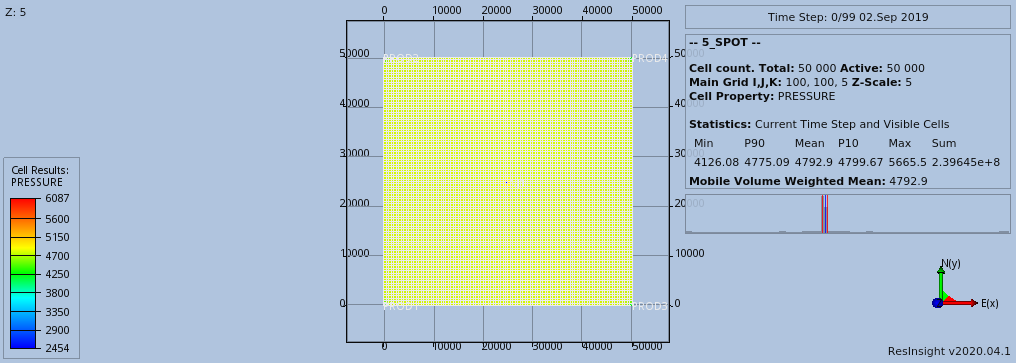

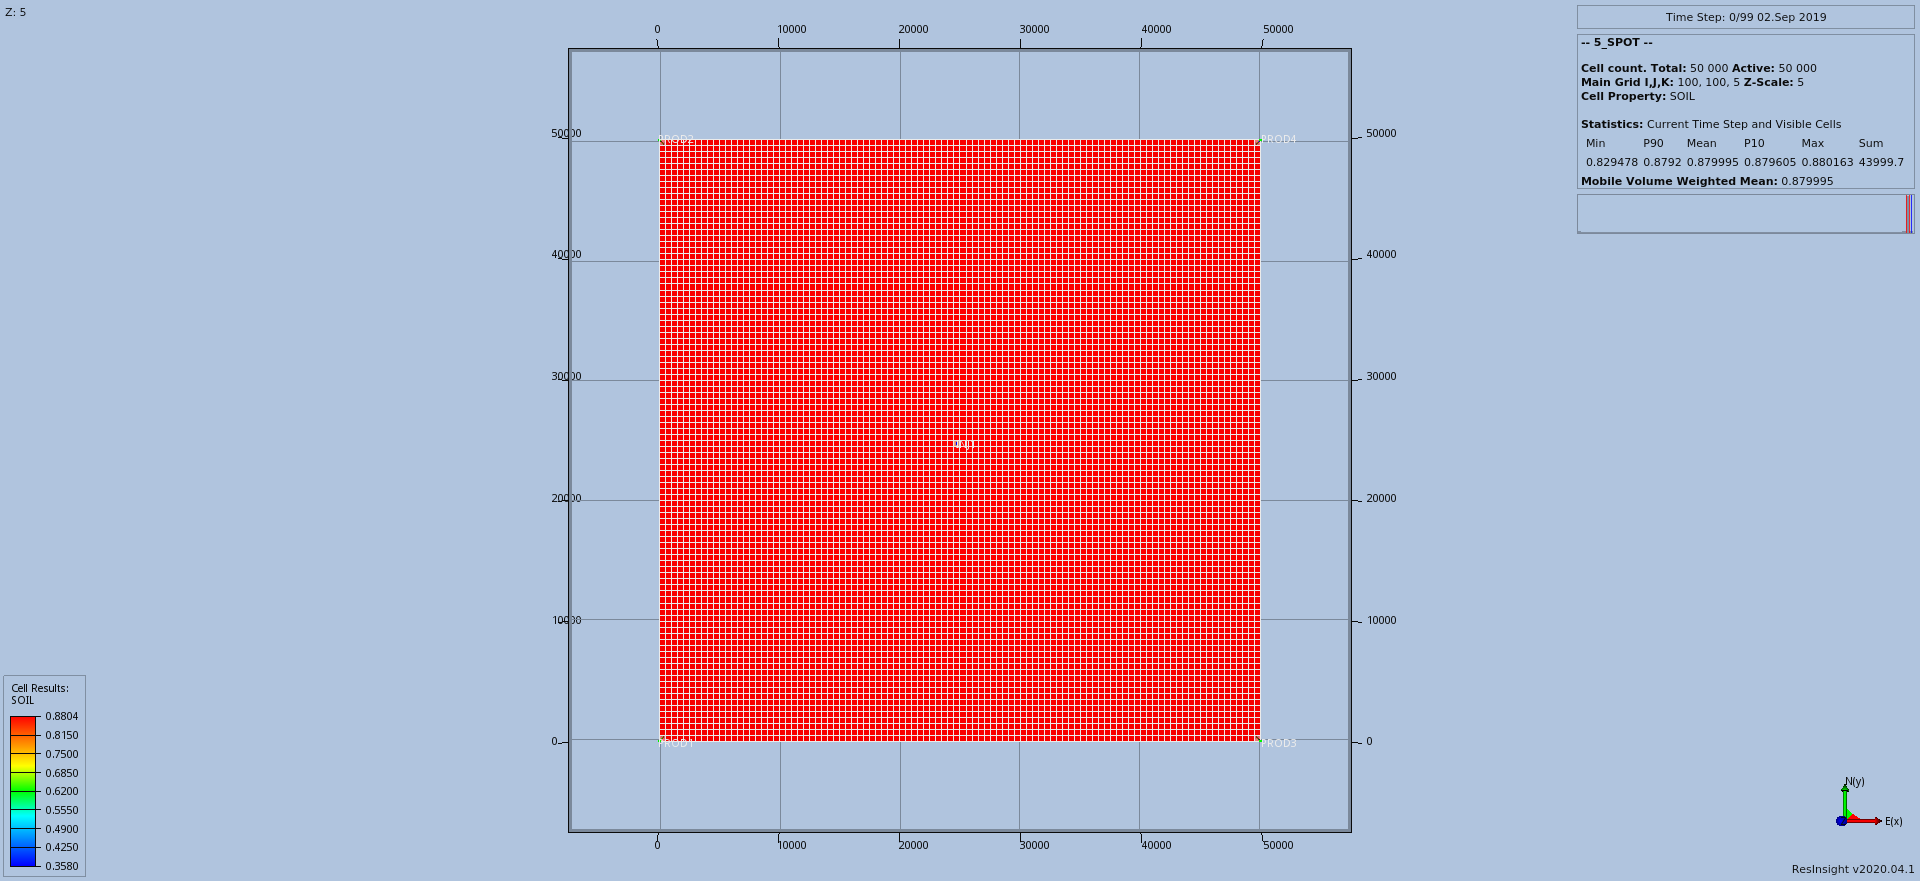

In [18]:
model_factory.display_grids()

**А также на результаты расчета за все время**

In [46]:
model_factory.iplot_fig()

# Lets create own model

In [3]:
# set necessary keys
keys=["WOPR:*", "WWPR:*", "WLPR:*",
            "WGPR:*", "WWIR:*", "WGOR:*", "WBHP:*",
            "WOPT:*", "WWPT:*", "WLPT:*", "WGPT:*",
            "WWIT:*", "FOPT", "FWPT", "FLPT", "FGPT",
            "FWIT"]

In [21]:
# Set model parameters
model_name = 'TEST_MODEL' # название модели (только с заглавное wip)
result_name = model_name + '_RESULT'
# Зададим размеры модели и ячеек:
nx = 21
ny = 21
nz = 4
dx = 500 
dy = 500 
dz = 20
# Зададим пористость и проницаемость:
por = 0.3
permx = 100
permy = permx
permz = 0.1*permx
# Зададим название и расположение добываюещей скважины:
prod_names = ['P1']
prod_xs=[1]
prod_ys=[1]
prod_z1s=[1]
prod_z2s=[2]
# Зададим название и расположение нагнетательной скважины:
inj_names=['I1']
inj_xs=[21]
inj_ys=[11]
inj_z1s=[3] # вскроем разные пропластки для реализации вертикально-латерального заводнения
inj_z2s=[4]

# SKin, start/stop (tops& uroven vnk & mult pore volume) density

Create new model:

In [22]:
new_model = ModelGenerator(init_file_name='RIENM1_INIT.DATA', nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, por=por, permx=permx,
                 permy=permy, permz=permz, prod_names=prod_names, prod_xs=prod_xs, prod_ys=prod_ys, prod_z1s=prod_z1s, prod_z2s=prod_z2s,
                 inj_names=inj_names, inj_xs=inj_xs, inj_ys=inj_ys, inj_z1s=inj_z1s, inj_z2s=inj_z2s)
new_model.create_model(model_name, result_name, keys)

DIMENS detected
DIMENS written
DX detected
DX written
DY detected
DY written
DZ detected
DZ written
TOPS detected
TOPS written
PORO detected
PORO written
PERMX detected
PERMX written
PERMY detected
PERMY written
PERMZ detected
PERMZ written
WELSPECS detected
WELSPECS written
COMPDAT detected
COMPDAT written
WCONPROD detected
WCONPROD written
WCONINJE detected
WCONINJE written
TEST_MODEL_RESULT.csv is created
TEST_MODEL_RESULT.csv is read
График построен и сохранен в атрибутах класса
Trying port 50051
Exporting to folder: /home/re/Documents/GitHub/OPM_model_generator/snapshots/TEST_MODEL


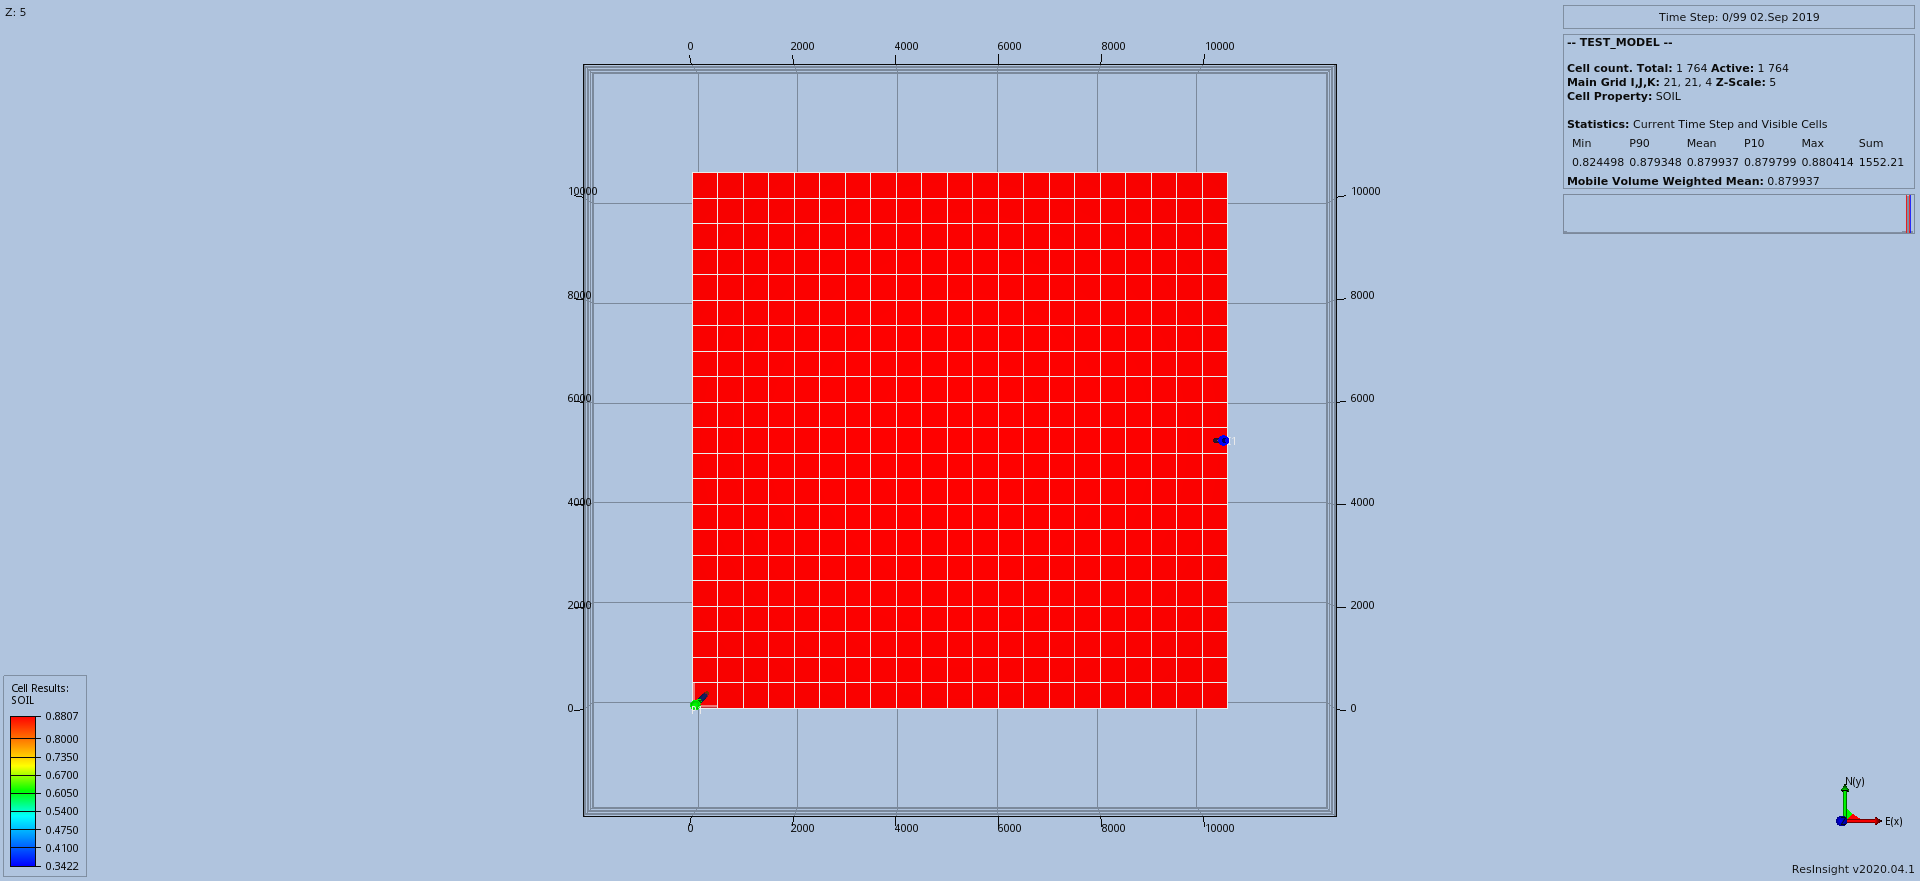

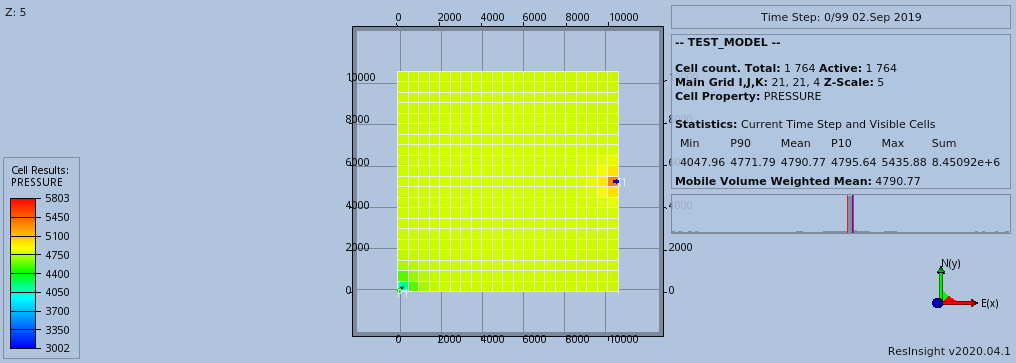

In [23]:
new_model.display_grids() # take the current snapshot WIP

In [20]:
#new_model.iplot_fig()
print(new_model.dir)

/home/re/Documents/GitHub/OPM_model_generator/snapshots/5_SPOT
